In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

We're going to use warnings to avoid using a lower K value than we have groups, math for the square root functionality, at least initially (since I will show a more efficient method), and then Counter from collections to get the most popular votes.

Next, we create some data:

In [2]:
dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

The dataset is just a Python dictionary with the keys being the color of the points (think of these as the class), and then the datapoints that are attributed with this class. If you recall our breast cancer dataset, the classes were numbers, and often times will be numbers to work with scikit-learn. For example, "benign" was translated to being given an arbitrary number of "2" and malignant was given the number of "4" in the dataset, rather than a string. This is mainly because Scikit-Learn simply required use to use numbers, but you do not inherently actually need to use numbers for your classes with a K Nearest Neighbors classifier. Next, we just specify a simple data set, 5,7 to be data we want to test. We can create a quick graph by doing:

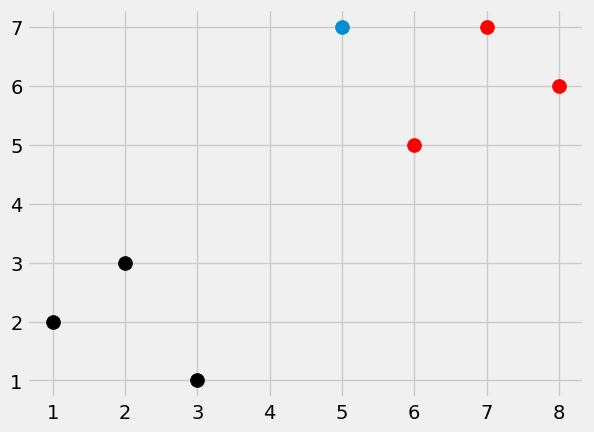

In [3]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

The line that is [[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset] is the same as:

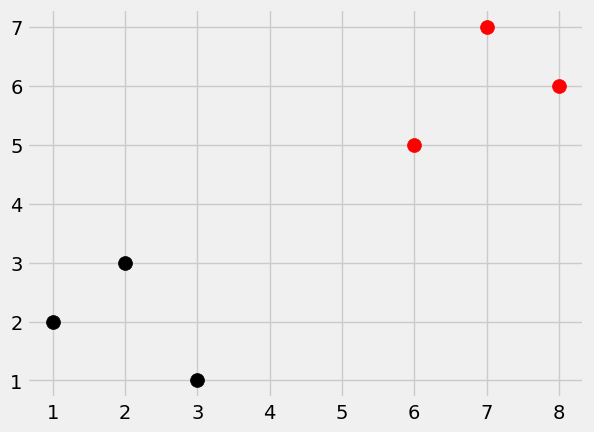

In [4]:
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)

You can see there are obvious groups of red and black, and then we have the blue dot. The blue dot is the new_features, which we're going to attempt to classify.

We have our data, now we want to create some sort of function that will actually classify the data:

In [5]:
def k_nearest_neighbors(data, predict, k=3):

    return vote_result

There's a skeleton of what we expect to have here to start. We want a function that will take in data to train against, new data to predict with, and a value for K, which we'll just set as defaulting to 3.

Next, we'll begin populating the function, first with a simple warning:

In [6]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')

    return vote_result

We have this warning to warn the user if they attempt to use the K Nearest Neighbors function to vote where the nearest neighbors selected is less than or equal to the number of groups that can vote (since allowing for this could still give us a tie).

Now, how do we find the closest three points? Is there some magical formula that finds these? Unforunately not. If there ever was one, that would be massive. Why? The main downfall of K Nearest Neighbors is that we have to compare the data in question to all of the points from the dataset before we can know what the closest three points are. As such, K Nearest Neighbors performs slower and slower the more data you have. We'll get there in the end, but consider if there is a way to speed up the process as we go.

The way I am going to handle this task is to create a Python list, which will contain another list, which will contain the distance, followed by the class, per point in our dataset. Once populated, we can sort the list by distance, take the first k values from that list, find the most popular, and we have our answer!

In [7]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')

    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )
            distances.append([euclidean_distance,group])


That's one way to calculate Euclidean distance, and it's the most clear when it comes to being obvious about following the definition. That said, using NumPy is going to be quite a bit faster. With KNN being a sort of brute-force method for machine learning, we need all the help we can get. Thus, we're going to modify the function a bit. One option could be:

In [10]:
euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
print(euclidean_distance)


NameError: name 'features' is not defined

This is still relatively clear, we're just using the NumPy version of things. Numpy is a C-optimized and very efficient library, allowing us to perform math much quicker in many cases. That said, it turns out, Numpy actually has various linear algebra functions we can use. For example, there's norm (which is the same calculation we're looking for):

In [11]:
euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
print(euclidean_distance)

NameError: name 'features' is not defined

Euclidean Distance is the name for measuring the length of a line segment between points. Euclidean Norm measures the magnitude of a vector. Magnitude of a vector is basically the length, and the equations are identical. The name just tells you in what space you're using it.

I am going to continue to use this last one, but I wanted to keep my promise that we'd break all this down easily into code. If you were not aware of Numpy's built in ability to do this, then you'd need to still know how to do it.

Now, outside of the for loop, we have the distances list which is a list that contains lists of distance and class. We want to sort that list, and then take the first k elements, taking the index of 1, which is the class.

In [12]:
votes = [i[1] for i in sorted(distances)[:k]]

NameError: name 'distances' is not defined

Above, we're going through each list, within the distance list, which is sorted. The sort method will sort based on the first item in each list within the list. That first item is the distance, so when we do sorted(distances), we're sorting the list by shortest to greatest distance. Then we take the [:k] of this list, since we're interest in only k of the nearest neighbors. Finally, in the outermost layer of this for loop, we're taking i[0], where i was the list within the list, which contained [distance,class]. Beyond finding the k closest distances, we actually do not care what the distance was in this case, just the class now.

So these are the 3 votes, now we need to find the majority vote. We'll use Counter from the collections Python standard library module:

In [13]:
vote_result = Counter(votes).most_common(1)[0][0]


NameError: name 'votes' is not defined

Collections finds the most common elements. In our case, we just want the single most common, but you can find the top 3 or top 'x.' Without doing the [0][0] part, you get [('r', 3)]. Thus, [0][0] gives us the first element in the tuple. The three you see is how many votes 'r' got.

Finally, you return the prediction and you're done. All together now:

In [14]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')

    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

Now, if we want to make a prediction based on the plot we chose earlier:

In [15]:
result = k_nearest_neighbors(dataset, new_features)
print(result)

r


Sure enough, I get r, which was the hope. Let's graph it:

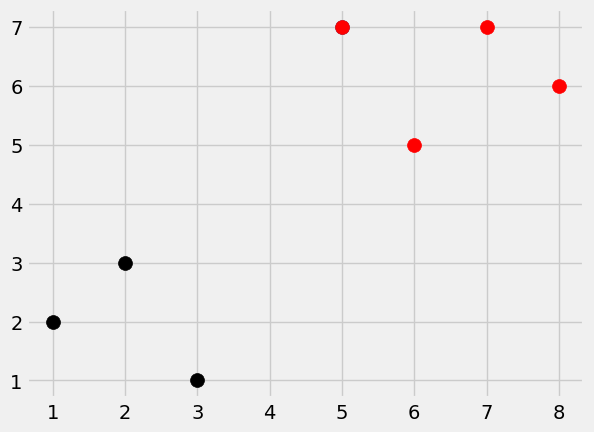

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')

    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)

plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)
plt.show()

Testing our K Nearest Neighbors classifie

In [ ]:
https://pythonprogramming.net/testing-our-k-nearest-neighbors-machine-learning-tutorial/?completed=/coding-k-nearest-neighbors-machine-learning-tutorial/